disclaimer: To ensure that the notebook can be run from (more or less) any point, I try to load the relevant functions or modules whenever I use them in a cell. This is generally not good practice as it adds unneccesary overhead

# 0.  Image representation as numerical arrays
### We start by importing numpy and creating and printing a simple 9x9 checkerboard array


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload
import numpy as np

#make a 9x9 checkerboard
checkBoard = np.zeros((9,9))
checkBoard[0::2,1::2]=1
checkBoard[1::2,0::2]=1

print(checkBoard)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]]


### Then, we import [pyplot](https://matplotlib.org/api/pyplot_api.html) and [image](https://matplotlib.org/api/image_api.html) modules from the ploting library [matplotlib](https://matplotlib.org/3.1.1/api/index.html). Using it, we can display our checkerboard array in image form:

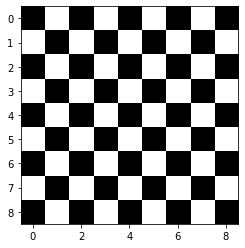

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(checkBoard, cmap='gray') 
plt.show()

### As another simple example, we will import the [data](https://scikit-image.org/docs/dev/api/skimage.data.html) module image processing library [scikit-image](https://scikit-image.org/) and load a small image of a bush. 

#### First, we want to print the pixel values:

In [8]:
from skimage import data
image_of_a_bush = data.lfw_subset()
image_of_a_bush = image_of_a_bush[0,:,:]

#print the #of dimentions, the shape, and the pixel values of the image
print("The number of dimensions of the image is: ", image_of_a_bush.ndim)
print("The size of the image is: ", image_of_a_bush.shape)
print(image_of_a_bush)

The number of dimensions of the image is:  2
The size of the image is:  (25, 25)
[[0.28888887 0.32941177 0.38039216 0.50326794 0.47973856 0.50457519
  0.55947715 0.54901963 0.56732029 0.57516342 0.59738559 0.61307186
  0.59607846 0.56078434 0.54248363 0.49281046 0.45359477 0.44183007
  0.2522876  0.23529412 0.4261438  0.49673203 0.72418302 0.69934636
  0.43529412]
 [0.29411766 0.33333334 0.44052288 0.52026147 0.49934641 0.53464049
  0.55424833 0.59869283 0.6156863  0.61960787 0.620915   0.63660127
  0.62875813 0.6326797  0.59215689 0.52418303 0.47581699 0.44705883
  0.34640524 0.32287583 0.33202612 0.59738559 0.81830066 0.77777773
  0.27843139]
 [0.35294119 0.41568628 0.42745098 0.48104575 0.50457519 0.52287579
  0.53594774 0.63529414 0.65359479 0.620915   0.61830068 0.64444441
  0.61830068 0.61830068 0.60000002 0.53856206 0.46405229 0.43137255
  0.37254903 0.37908494 0.29411766 0.50065356 0.60915029 0.53856206
  0.36732024]
 [0.41176471 0.43006536 0.49542484 0.48627451 0.50980395 0.52

### Can you see the bush? 

#### Next, show the image:

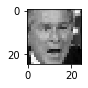

In [9]:
plt.figure(figsize=(1,1))

# display the image
plt.imshow(image_of_a_bush, cmap='gray') 
plt.show()

# 1. Pixel-level operations 
### Now that we have a sense of what a digital image is, let's start manipulating it. We'll begin with simple pixel-level operations

## 1.1 Basic pixel-level operations
### Let's look at a more interesting image. From scikit-image data we'll open a example IHC image, and plot it using pyplot.

The number of dimensions of the image is:  3
The size of the image is:  (512, 512, 3)


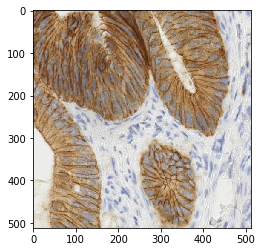

In [22]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

image_hist = data.immunohistochemistry()
#check the size of the image
print("The number of dimensions of the image is: ", image_hist.ndim)
print("The size of the image is: ", image_hist.shape)
plt.imshow(image_hist, cmap=plt.cm.gray)

### Seems like we have an RGB image. Let's look at every channel independently.

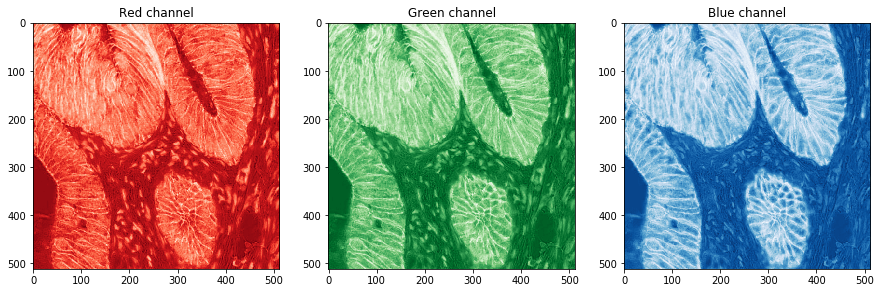

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.gca().set_title('Red channel')
plt.imshow(image_hist[:,:,0], cmap='Reds', interpolation='nearest')
plt.subplot(132)
plt.gca().set_title('Green channel')
plt.imshow(image_hist[:,:,1], cmap='Greens', interpolation='nearest')
plt.subplot(133)
plt.gca().set_title('Blue channel')
plt.imshow(image_hist[:,:,2], cmap='Blues', interpolation='nearest')

plt.show()

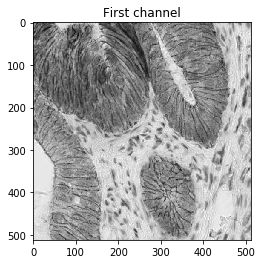

In [24]:
#for the moment let's look at only the first color channel
image_hist = image_hist[:,:,0]
plt.gca().set_title('First channel')
plt.imshow(image_hist, cmap=plt.cm.gray)


### We can invert the image using the *invert* function from [scikit-images utilities module](https://scikit-image.org/docs/dev/api/skimage.util.html):

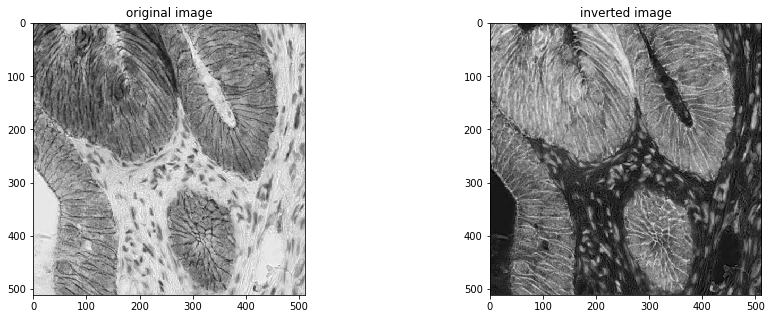

In [25]:
from skimage.util import invert

inverted_image = invert(image_hist)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.gca().set_title('original image')
plt.imshow(image_hist, cmap=plt.cm.gray)
plt.subplot(122)
plt.gca().set_title('inverted image')
plt.imshow(inverted_image, cmap=plt.cm.gray)


In [26]:
from skimage.util import invert
invert?

### Let's try some other pixel-level operations. We'll use the [Exposure module](https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.adjust_sigmoid) from scikit image.

1. A gamma correction applies the nonlinear transform $V_{out} = V_{in}^\gamma$.

2. A log transform applies $V_{out} = log(V_{in}+1)$.

3. A sigmoid transform applies $V_{out} = \frac{1}{1+e^{gain\cdot(\text{cutoff}-V_{in})}}$.

4. Equalization transforms the intensity histogram of an image to a uniform distribution. It often enhances the contrast of the image

5. Contrast Limited Adaptive Histogram Equalization (CLAHE) works similarly to equalization thats applied separately to different regions of the image.

Try to apply these by calling the relevant function from skimage.exposure, or by direct calculation. 

Play with the different parameters and see how they change the output.

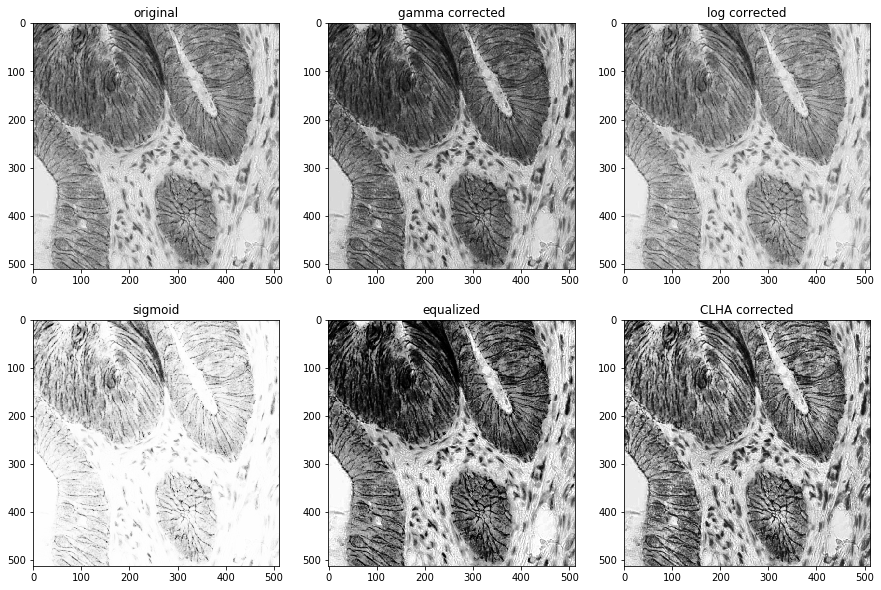

In [29]:
from skimage import exposure

# apply gamma scaling with gamma=2
gamma=2
gamma_corrected = exposure.adjust_gamma(image_hist, gamma=gamma)

# apply logarithmic scaling
logarithmic_corrected = exposure.adjust_log(image_hist)

# apply sigmoidal scaling with cutoff=0.4
cutoff = 0.4
sigmoid_corrected = exposure.adjust_sigmoid(image_hist, cutoff)

# equalize
equalize_corrected = exposure.equalize_hist(image_hist)

# apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
CLHA_corrected = exposure.equalize_adapthist(image_hist)

plt.figure(figsize=(15,10))

plt.subplot(231)
plt.gca().set_title('original')
plt.imshow(image_hist, cmap=plt.cm.gray)

plt.subplot(232)
plt.gca().set_title('gamma corrected')
plt.imshow(gamma_corrected, cmap=plt.cm.gray)

plt.subplot(233)
plt.gca().set_title('log corrected')
plt.imshow(logarithmic_corrected, cmap=plt.cm.gray)

plt.subplot(234)
plt.gca().set_title('sigmoid')
plt.imshow(sigmoid_corrected, cmap=plt.cm.gray)

plt.subplot(235)
plt.gca().set_title('equalized')
plt.imshow(equalize_corrected, cmap=plt.cm.gray)

plt.subplot(236)
plt.gca().set_title('CLHA corrected')
plt.imshow(CLHA_corrected, cmap=plt.cm.gray)

## 1.2 Image filtering

### Spatial filtering is an image processing technique for changing the intensities of a pixel according to the intensities of some neighborhood of pixels. 
<img src="./images/same_padding_no_strides.gif" width="400" height="200" >


### The *Kernel* of the filter defines the neighborhood and the weights asigned to each pixel in the neighborhood:

<img src="./images/spatialFilter.jpg" width="400" height="200" >
This procedure is formally a convolution and is marked by an asterisk: $I_o = I_i\ast f$. 

*side note: since a convolution in the spatial domain is equivalent to multiplication in the frequency domain. Sometimes it is more computationally reasonable to calculate these in fourier space.*

*side side note: filtering can also be performed in the frequency domain by directly removing a set of frequencies from an image.*


### The kernel can be of any shape/size, it is applied to each pixel in the image, and the output is a new, filtered, image. The output image is often called the *response* to the given filter.
Example, local average: <img src="./images/spatialFilterExample.jpg" width="300" height="150">


#### Filtering is an incredibly versatile tool with which you can emphasize certain features or remove other features. 
#### Image processing operations implemented with filtering include smoothing, sharpening, and edge enhancement.


### To implement different image filters, we will use the [filters module from scikit-image](https://scikit-image.org/docs/dev/api/skimage.filters.html)

### 1.2.1 Smoothing

#### Smoothing, aka low-pass filtering, is used for removing high-frequency noise from images. Most commonly, a gaussian kernel is used, but others (e.g. local mean/median) work too. We'll see the effect of gaussian filtering.

Try to change the value of sigma (width of the gaussian) to see how the output changes.

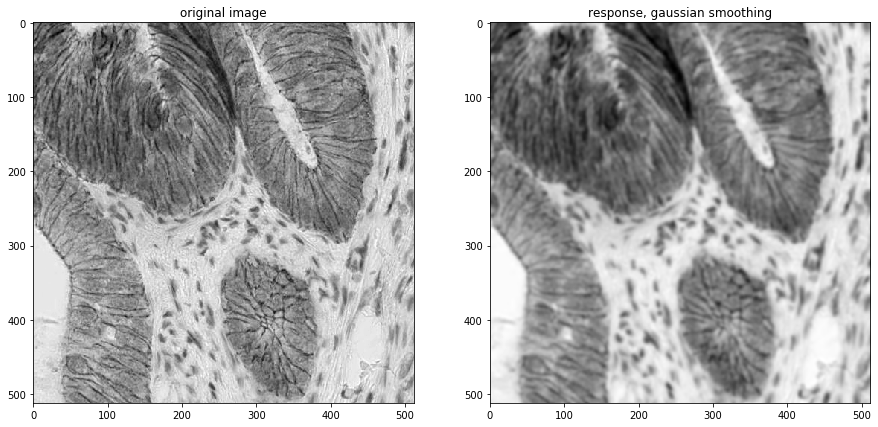

In [38]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import filters

image_hist = data.immunohistochemistry()

sigma = 2

gauss_filtered_img = filters.gaussian(image_hist[:,:,0], sigma=sigma)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.gca().set_title('original image')
plt.imshow(image_hist[:,:,0], cmap=plt.cm.gray)
plt.subplot(122)
plt.gca().set_title('response, gaussian smoothing')
plt.imshow(gauss_filtered_img, cmap=plt.cm.gray)



### 1.2.2 Sharpening

#### sharpening is sometimes used to enhance a blurry (i.e. crappy) image. 


1. Start with input image
2. Apply gaussian filter with very narrow kernel
3. Subtract filtered image from input image to get only high frequency components
3. Amplify (alpha) and add high frequency components to original input image 


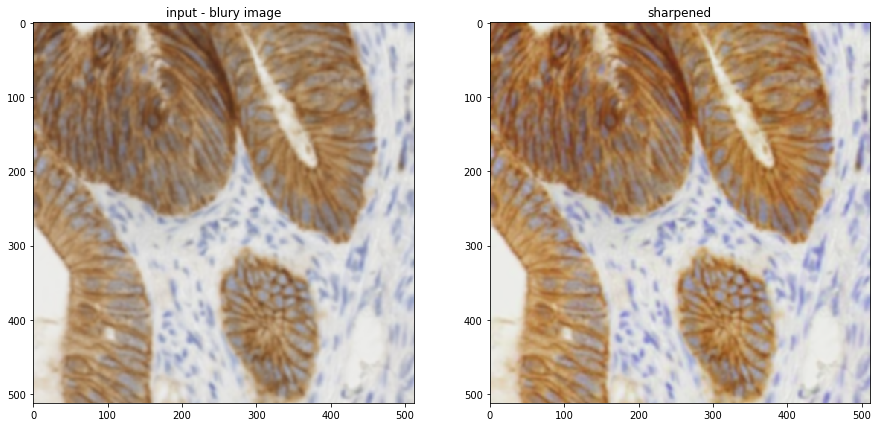

In [34]:
filter_blurred_f = filters.gaussian(gauss_filtered_img, sigma=0.5, multichannel=False)
alpha = 3
sharpened = gauss_filtered_img + alpha * (gauss_filtered_img - filter_blurred_f)


plt.figure(figsize=(15,8))
plt.subplot(121)
plt.gca().set_title('input - blury image')
plt.imshow(gauss_filtered_img, cmap=plt.cm.gray)
plt.subplot(122)
plt.gca().set_title('sharpened')
plt.imshow(sharpened, cmap=plt.cm.gray)


#### Direct application of edge detectors often results in somewhat noisy responses. A way to overcome this is by first smoothing the image with a gaussian filter and then applying the edge filter. The width of the gaussian kernel will determine the size of edges the filter detects.

### 1.2.3 Edge enhancement

#### Edge detecting filters work by measuring the local spatial gradient of an image. Common types are the Sobel, Prewitt and Roberts. 

#### The filters are usually applied to each direction individually and then the total magnitude of the gradient is calculated.
$|\nabla| = \sqrt{\nabla_x^2+\nabla_y^2}$

#### Sobel: 
<img src="./images/sobmasks.gif" width="200" height="100" align="left">

<br><br><br><br>

#### Prewitt: 
<img src="./images/premasks.png" width="200" height="100" align="left">

<br><br><br><br>

#### Roberts: 
<img src="./images/robmasks.gif" width="200" height="100" align="left">



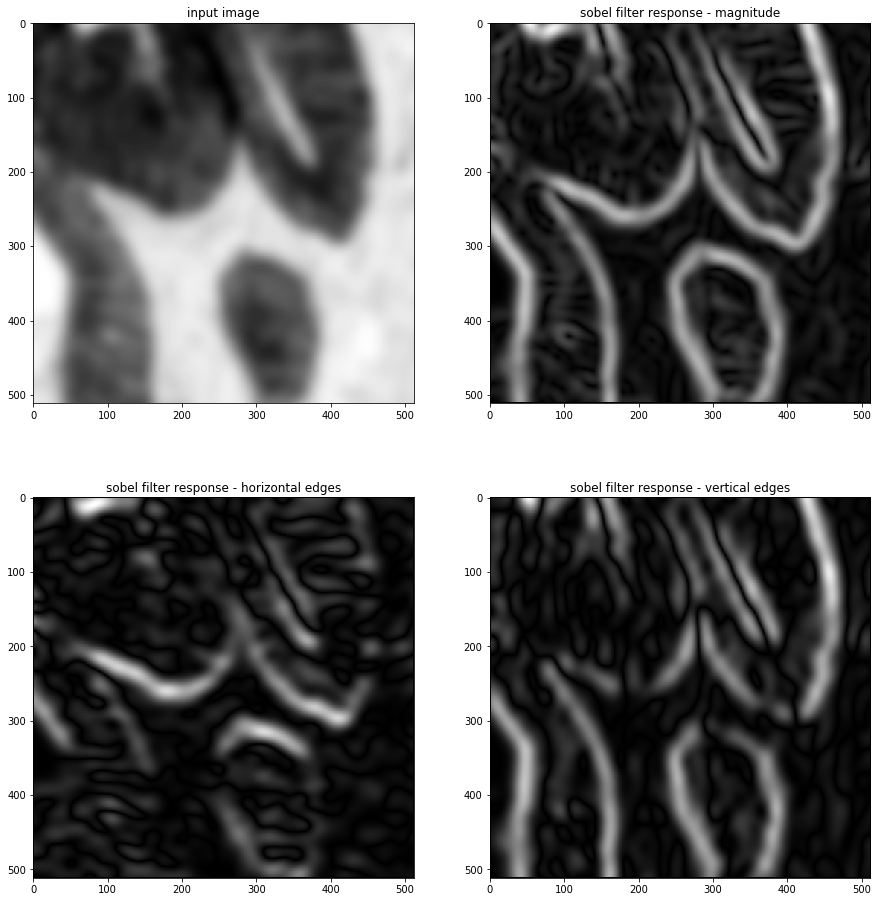

In [42]:
from skimage import data
image_hist = data.immunohistochemistry()

image_hist = filters.gaussian(image_hist[:,:,2], sigma=10)


# sobel magnitude
filtered_img = filters.sobel(image_hist)
# sobel horizontal
filtered_img_h = filters.sobel_h(image_hist)
# sobel vertical
filtered_img_v = filters.sobel_v(image_hist)

plt.figure(figsize=(15,16))
plt.subplot(221)
plt.gca().set_title('input image')
plt.imshow(image_hist, cmap=plt.cm.gray)
plt.subplot(222)
plt.gca().set_title('sobel filter response - magnitude')
plt.imshow(filtered_img, cmap=plt.cm.gray)
plt.subplot(223)
plt.gca().set_title('sobel filter response - horizontal edges')
plt.imshow(np.abs(filtered_img_h), cmap=plt.cm.gray)
plt.subplot(224)
plt.gca().set_title('sobel filter response - vertical edges')
plt.imshow(np.abs(filtered_img_v), cmap=plt.cm.gray)

#### Direct application of edge detectors often results in somewhat noisy responses. A way to overcome this is by first smoothing the image with a gaussian filter and then applying the edge filter. The width of the gaussian kernel will determine the size of edges the filter detects.

In [ ]:
from skimage import data
from skimage import feature

image_hist = data.immunohistochemistry()
image_hist = image_hist[:,:,2]

# sobel magnitude
filtered_img = filters.sobel(image_hist)

#apply a gaussian filter, followed by a sobel filter with sigma=3
sigma=
DoG_img = 

plt.figure(figsize=(15,16))
plt.subplot(221)
plt.gca().set_title('input image')
plt.imshow(image_hist, cmap=plt.cm.gray)

plt.subplot(223)
plt.gca().set_title('sobel filter response - magnitude')
plt.imshow(filtered_img, cmap=plt.cm.gray)
plt.subplot(224)
plt.gca().set_title('DoG filter response - magnitude')
plt.imshow(DoG_img, cmap=plt.cm.gray)

### 1.2.4 Gaussian derivatives 
Now let's remember that the application of filters is an associative operation (because convolution is linear!). It's equivalent to apply the gaussian and then the gradient filter to the image and to apply the gradient filter to the gaussian, then apply the result to the image, i.e. $\nabla*(G*I) = (\nabla*G)*I$ where $\nabla$ is the gradient (derivative) filter, $G$ is the gaussian filter, and $I$ is the image.

We can generalize this idea and apply the derivative multiple times, to get a family of interesting filters:

$\nabla^n*G$:

<img src="./images/GaussianDerivs.png" width="800" height="200">

<br><br>

Notice that all of the even orders are edge detectors, while all the odd orders are ridge detectors!

### Let's use a second order derivative (aka a Laplacian) and make a ridge detector:
#### We'll look at a retinal photo where vasculature is an interesting feature. We invert the image so that the vasculature appears as bright lines on a dark background

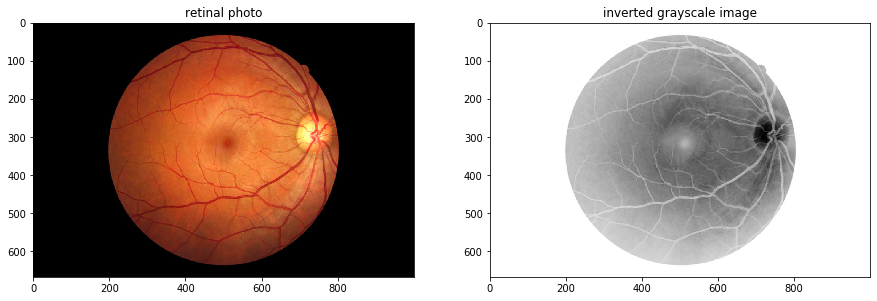

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from skimage.util import invert

#this is how we load an image from the hard drive
image_retina = ((img_as_float(mpimg.imread("../Data/RetinalPhoto.png"))))
image_ridges = invert(rgb2gray(image_retina))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.gca().set_title('retinal photo')
plt.imshow(image_retina, cmap=plt.cm.gray)
plt.subplot(122)
plt.gca().set_title('inverted grayscale image')
plt.imshow(image_ridges, cmap=plt.cm.gray)


**Apply a gaussian filter, followed by a second order derivative (laplacian).**

Text(0.5, 1.0, 'retinal photo - response to LoG')

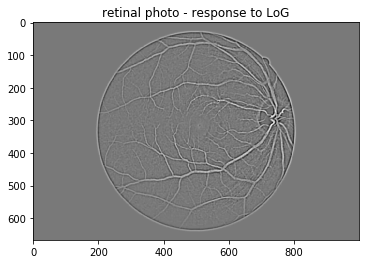

In [47]:
sigma=2
LoG_ridges = filters.laplace(filters.gaussian(image_ridges,sigma=sigma))

plt.imshow(LoG_ridges,cmap='gray')
plt.gca().set_title('retinal photo - response to LoG')

**This commonly used ridge detector is called a Laplacian of Gaussian (LoG)!**

(We'll get back to this image in a bit)

## 1.3 Masking

### A mask is a binary image (0s and 1s) that typically separates a given input image into Foreground (interesting) and Background (boring) regions, or for picking a region-of-interest (ROI). A mask is *applied* to an image by element-wise multiplication. The size of a mask must be *identical* to the size of the image it's applied to.


### Let's begin by creating a simple circular mask. We'll create an array where the value at each point is it's distance from the center of the image, and display it as an image:

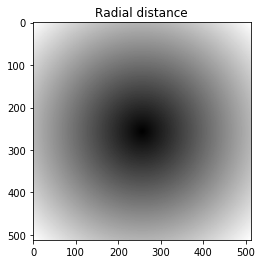

In [48]:
import matplotlib.pyplot as plt
import numpy as np

#dimensions in x and y
y = 512
x = 512

#position of center
centY = np.ceil(y/2)
centX = np.ceil(x/2)

#create the grid
yy,xx = np.indices((y,x))

#create radial distance map
radialDist = np.sqrt((xx-centX)**2+(yy-centY)**2)

#display
plt.gca().set_title('Radial distance')
plt.imshow(radialDist, cmap='gray', interpolation='nearest')
plt.show()

### Of these points, we'll pick a circle of radius 100 and display it as an image:

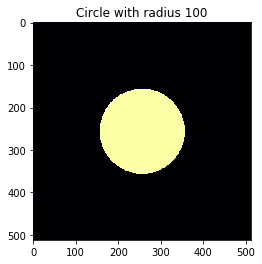

In [49]:
circ1 = radialDist<100

plt.show()
plt.gca().set_title('Circle with radius 100')
plt.imshow(circ1, cmap='inferno', interpolation='nearest')

#### This object is a **mask**. If you multiply this matrix of 0s and 1s with an image of the same size, only the parts that are ==1 will remain

### Let's apply this mask to our histology image.

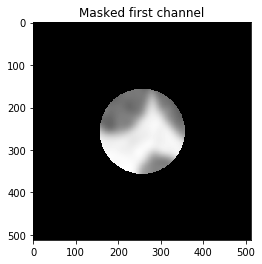

In [50]:
plt.gca().set_title('Masked first channel')
plt.imshow(image_hist*circ1, cmap=plt.cm.gray)


### What happens if we invert the mask?

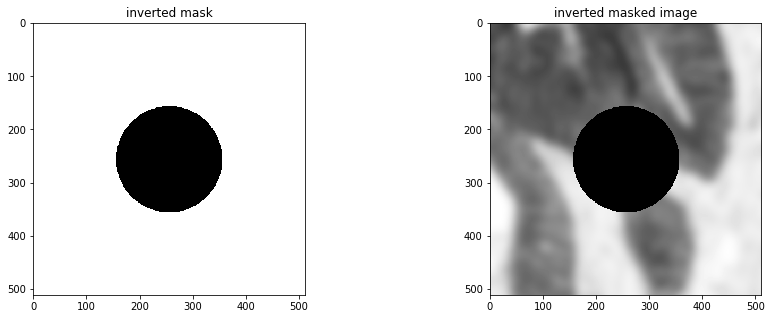

In [52]:
inverted_mask = invert(circ1)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.gca().set_title('inverted mask')
plt.imshow(inverted_mask, cmap=plt.cm.gray)
plt.subplot(122)
plt.gca().set_title('inverted masked image')
plt.imshow(image_hist*inverted_mask, cmap=plt.cm.gray)

**Just for closure, let's see what happens when we look at the full RGB image and try to apply the mask**

In [53]:
image = data.immunohistochemistry()

masked_image = image*circ1
plt.imshow(masked_image, cmap=plt.cm.gray)

ValueError: operands could not be broadcast together with shapes (512,512,3) (512,512) 

**Whoops. Seems like something is wrong. Our problem is that numpy didn't know how to multiply a 512x512x3 with a 512x512 mask. Numpy makes solving this very easy by adding a singleton dimension (look up broadcasting in your spare time).**

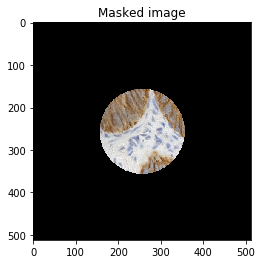

In [55]:
image = data.immunohistochemistry()
plt.gca().set_title('Masked image')
masked_image = image*np.expand_dims(circ1,2)
plt.imshow(masked_image, cmap=plt.cm.gray)


## 1.4 Thresholding
## 1.4.1 Simple thresholding
### Thresholding an image is the process of setting an intensity (or intensities) for separating the different components of an image.

<img src="./images/Thresholding.png" width="600" height="600" >


#### In simplest case, the foreground and background have very different intensities. In that case thresholding is just clustering pixels by their intensity levels. 


The number of dimensions of the image is:  2
The size of the image is:  (512, 512)


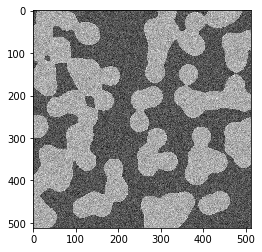

In [56]:
#this function from skimage converts images of integer types into floats, which are easier to work with.
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
from skimage import data

# First, let's create a noisy image of blobs
image_blobs = img_as_float(data.binary_blobs(length=512, seed=1))
sigma = 0.22
image_blobs += np.random.normal(loc=0, scale=sigma, size=image_blobs.shape)

print("The number of dimensions of the image is: ", image_blobs.ndim)
print("The size of the image is: ", image_blobs.shape)
plt.imshow(image_blobs, cmap=plt.cm.gray)

### To find the right threshold, let's examine a histogram of pixel intensity values

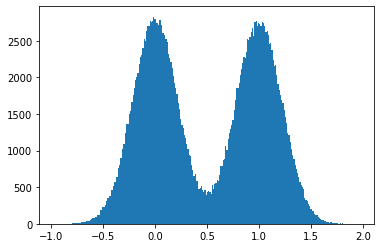

In [57]:
plt.hist(image_blobs.flatten(),bins=250)
plt.show()

Pick an appropriate threshold, by eye, and see if you can remove the background. 
What happens when you increase or decrease the threshold?

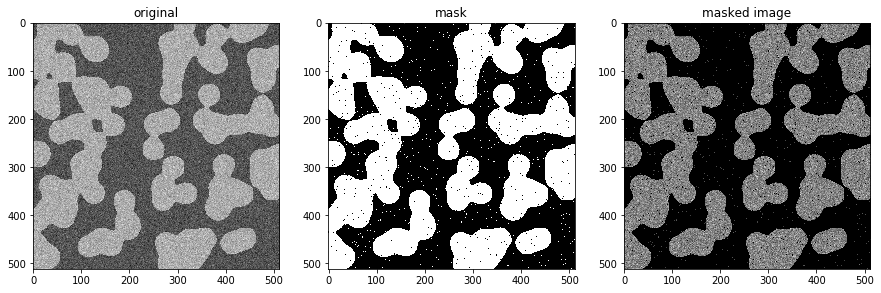

In [58]:
thresh = 0.5

mask = image_blobs>0.5

masked_image = mask*image_blobs

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.gca().set_title('original')
plt.imshow(image_blobs, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(132)
plt.gca().set_title('mask')
plt.imshow(mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(133)
plt.gca().set_title('masked image')
plt.imshow(masked_image, interpolation='nearest', cmap=plt.cm.gray)

### Our mask looks ok, but it has a lot of salt & pepper speckle noise. Why is that?
We can try and use what we learned before about filtering to clean up our results. What filter should we use?

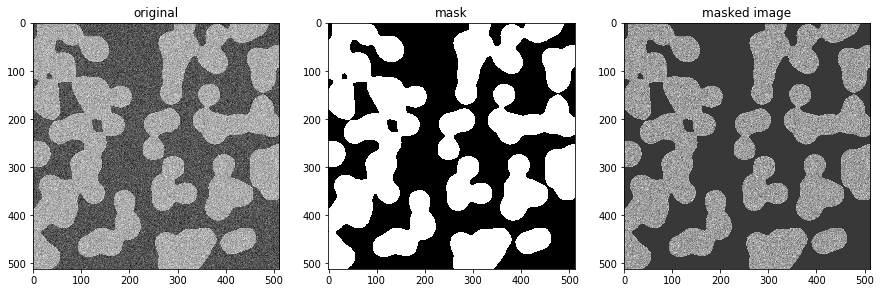

In [63]:
from skimage import filters

thresh = 0.5

mask = filters.gaussian(image_blobs,sigma=2)>thresh

masked_image = mask*image_blobs

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.gca().set_title('original')
plt.imshow(image_blobs, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(132)
plt.gca().set_title('mask')
plt.imshow(mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(133)
plt.gca().set_title('masked image')
plt.imshow(masked_image, interpolation='nearest', cmap=plt.cm.gray)

It's usually a good idea before creating a mask to despeckle an image using a narrow gaussian filter!

## 1.4.2 Morphological operations
Morphology is a broad set of image processing operations that process images based on shapes. In a morphological operation, each pixel in the image is adjusted based on the value of other pixels in its neighborhood. By choosing the size and shape of the neighborhood, you can construct a morphological operation that is sensitive to specific shapes in the input image. (explanation from Mathworks)

Morphological operations are based around a *structuring element*, which is a small binary image, often of a disk or a square. The structuring element is positioned at all possible locations in the image and it is compared with the corresponding neighbourhood of pixels. Some operations test whether the element "fits" within the neighbourhood, while others test whether it "hits" or intersects the neighbourhood.

Common operations for image processing

Erosion - output image =1 wherever the structuring element **fits** (erodes the mask)

Dilation - output image =1 wherever the structuring element **hits** (expands the mask)

Opening - Erosion followed by dilation (opens gaps in spots where the mask is weakly connected)

Closing - Dilation followed by erosion (closes holes in the mask)


A very thorough explanation of morphological operationscould be found [here](https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic4.htm)

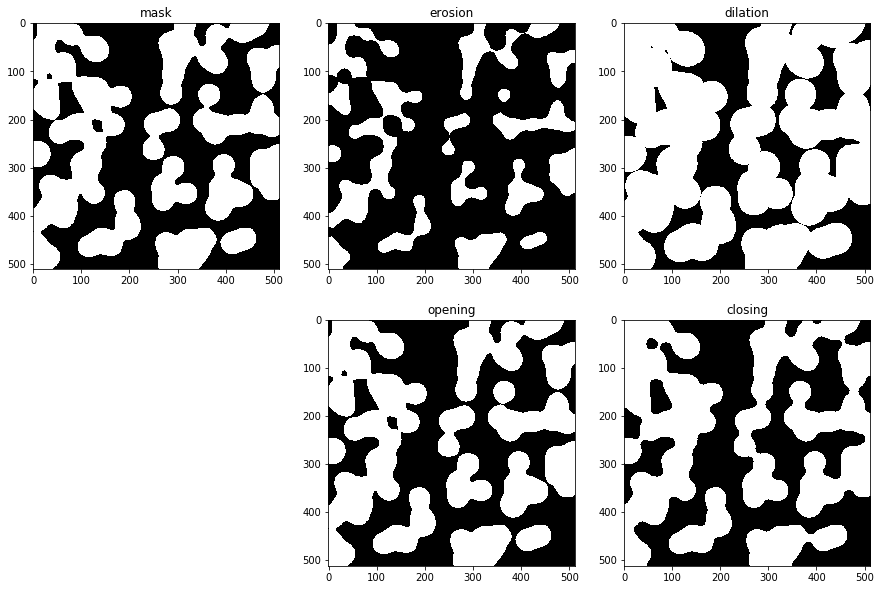

In [64]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

#define a "disk" structuring element with radius 10
selem = disk(10)

#apply erosion, dilation, opening, and closing
erosion_mask = erosion(mask,selem)

dilation_mask = dilation(mask,selem)

opening_mask = opening(mask,selem)

closing_mask = closing(mask,selem)


plt.figure(figsize=(15,10))
plt.subplot(231)
plt.gca().set_title('mask')
plt.imshow(mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(232)
plt.gca().set_title('erosion')
plt.imshow(erosion_mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(233)
plt.gca().set_title('dilation')
plt.imshow(dilation_mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(235)
plt.gca().set_title('opening')
plt.imshow(opening_mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(236)
plt.gca().set_title('closing')
plt.imshow(closing_mask, interpolation='nearest', cmap=plt.cm.gray)


## 1.4.3 Masking actual data

### We'll repeat the thresholding procedure using an actual microscopy image of fluorescent nuclei 

The number of dimensions of the image is:  2
The size of the image is:  (940, 1392)


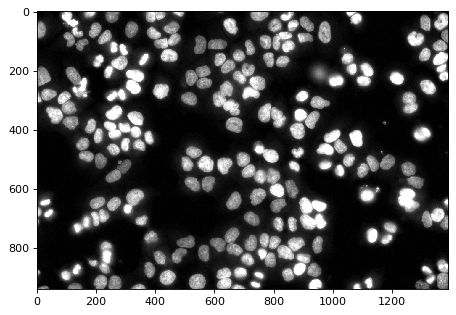

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg

#this is how we load an image from the hard drive
image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))


fig = plt.figure(num=None, figsize=(7.1, 4.6), dpi=80, facecolor='w', edgecolor='k')
print("The number of dimensions of the image is: ", image_nuclei.ndim)
print("The size of the image is: ", image_nuclei.shape)
plt.imshow(image_nuclei, cmap=plt.cm.gray, vmin=0, vmax=0.01)

### Again, let's plot a histogram of intensity values

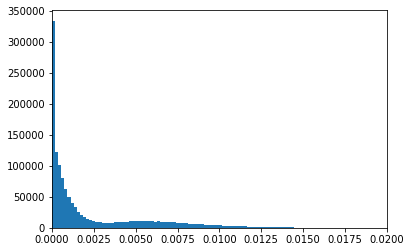

In [66]:
plt.hist(image_nuclei.flatten(),bins=250)
plt.xlim((0, 0.02))
plt.show()


### And again we'll pick a value by eye:

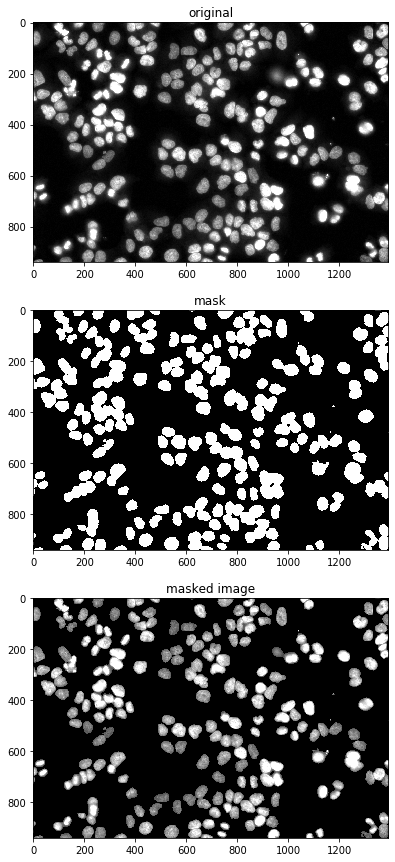

In [68]:
thresh = 0.003

#remember to despeckle before creating a mask!
mask = filters.gaussian(image_nuclei)>thresh

plt.figure(figsize=(8,15))
plt.subplot(311)
plt.gca().set_title('original')
plt.imshow(image_nuclei, interpolation='nearest', cmap=plt.cm.gray, vmin=0, vmax=0.01)
plt.subplot(312)
plt.gca().set_title('mask')
plt.imshow(mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(313)
plt.gca().set_title('masked image')
plt.imshow(image_nuclei*mask, interpolation='nearest', cmap=plt.cm.gray, vmin=0, vmax=0.01)

### Not bad! But also not very scalable. If we have 100s of images we can't look at them one-by-one and find thresholds by eye. Next, we'll look at some methods for automatically finding the thresholds.

## 1.5 Automated threshold calculation

### There is a very large list of algorithms for threshold calculation out there that are optimized for different situations. We will briefly review a few of the most common ones.

### 1.5.1 Iterative mean thresholding
Algorithm:
1. Start with some threshold $T_i$
2. Compute the means $m_0$ and $m_1$ of the BG and FG
3. Update $T_{i+1} = \frac{m_0+m_1}{2}$
4. Repeat until it converges

<img src="./images/meanThresh.gif" width="400" height="400" >

### 1.5.2 Otsu thresholding
The algorithm exhaustively searches for the threshold that minimizes the intra-class variance, defined for a given threshold $T$ as a weighted sum of variances of the two classes:
$\sigma^2_w(T)=\omega_0(T)\sigma^2_0(T)+\omega_1(T)\sigma^2_1(T)$

For 2 classes, minimizing the intra-class variance is equivalent to maximizing inter-class variance, which is much easier to calculate:
\begin{align}
\sigma^2_b(T) & =\sigma^2-\sigma^2_w(T)=\omega_0(\mu_0-\mu_T)^2+\omega_1(\mu_1-\mu_T)^2 \\
& =\omega_0(T) \omega_1(T) \left[\mu_0(T)-\mu_1(T)\right]^2
\end{align}

<img src="./images/Otsu's_Method_Visualization.gif" width="400" height="400" >

### 1.5.3 Triangle thresholding
Algorithm:
1. Draw a straight line between the histogram peak and the brightest value.
2. From every point on that line, draw the shortest connecting line to the histogram.
3. Find longest of these connecting lines.
4. Threshold is set at the intersection of that line and the curve.
<img src="./images/triThresh.png" width="400" height="400" >

*note: Triangle thresholding is good for situations where the image is mostly background, and there is no clear "peak" of bright pixels.*


### [scikit-image's filters module](https://scikit-image.org/docs/dev/api/skimage.filters.html) implements a large variety of thresholding algorithms. Let's apply the ones we just learned about.


In [70]:
from skimage import filters

#calculate iterative mean threshold
meanThresh = filters.threshold_mean(image_nuclei)
print(meanThresh)

#calculate otsu threshold
OtsuThresh = filters.threshold_otsu(image_nuclei)
print(OtsuThresh)

#calculate triangle
TriThresh = filters.threshold_triangle(image_nuclei)
print(TriThresh)


0.0023766113
0.0040662913
0.0022590505


### Let's look at the resulting masks we get with each of these thresholds

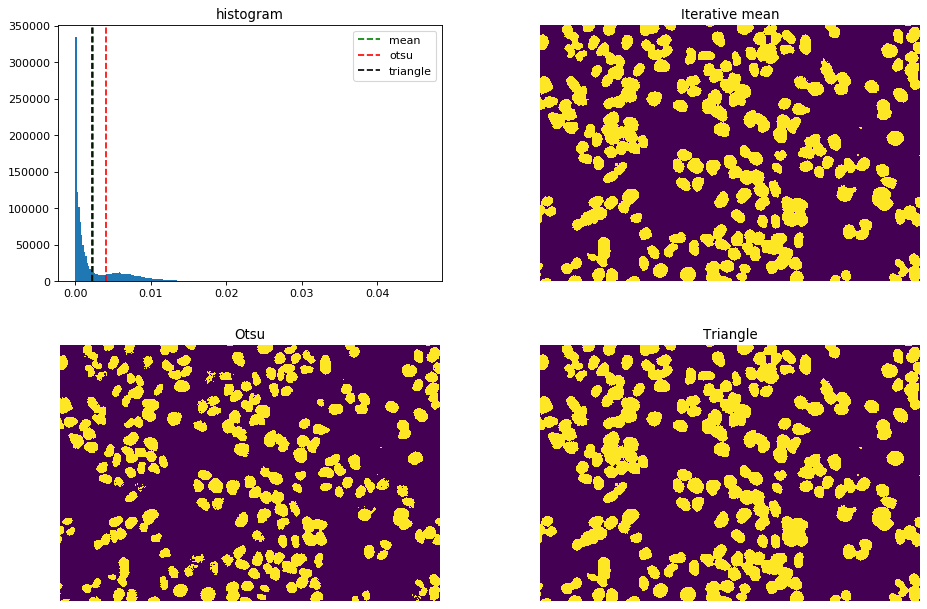

In [72]:
fig = plt.figure(num=None, figsize=(12, 8), dpi=80)
ax1 = fig.add_axes([0.1,0.6,0.4,0.4])

ax1.hist(image_nuclei.flatten(),bins=250)

ax1.axvline(meanThresh, color='g', linestyle='--')
ax1.axvline(OtsuThresh, color='r', linestyle='--')
ax1.axvline(TriThresh, color='k', linestyle='--')

ax1.legend(['mean' ,'otsu', 'triangle'])
ax1.set_title('histogram')

ax2 = fig.add_axes([0.6,0.6,0.4,0.4])
#get iterative mean mask (remember to despeckle)
mask_mean = image_nuclei>meanThresh

ax2.imshow(mask_mean)
ax2.set_title('Iterative mean')
ax2.set_axis_off()

ax2 = fig.add_axes([0.1,0.1,0.4,0.4])
#get otsu mask
mask_otsu = image_nuclei>OtsuThresh

ax2.imshow(mask_otsu)
ax2.set_title('Otsu')
ax2.set_axis_off()

ax2 = fig.add_axes([0.6,0.1,0.4,0.4])
#get triangle mask
mask_tri = image_nuclei>TriThresh

ax2.imshow(mask_tri)
ax2.set_title('Triangle')
ax2.set_axis_off()


## Let's briefly look back at the retinal images and try to mask only the vasculature:

**as before, load the image, invert, and apply LoG filter:**

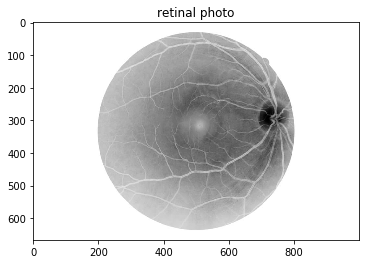

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage.color import rgb2gray

#this is how we load an image from the hard drive
image_ridges = invert(rgb2gray(img_as_float(mpimg.imread("../Data/RetinalPhoto.png"))))

plt.imshow(image_ridges, cmap=plt.cm.gray)
plt.gca().set_title('retinal photo')
sigma = 1
LoG_ridges = filters.laplace(filters.gaussian(image_ridges, sigma=sigma))
ax2.set_axis_off()

**Now, let's do the same procedure of automatically finding thresholds:**

8.9362285e-13
0.011158079
-0.0016442013


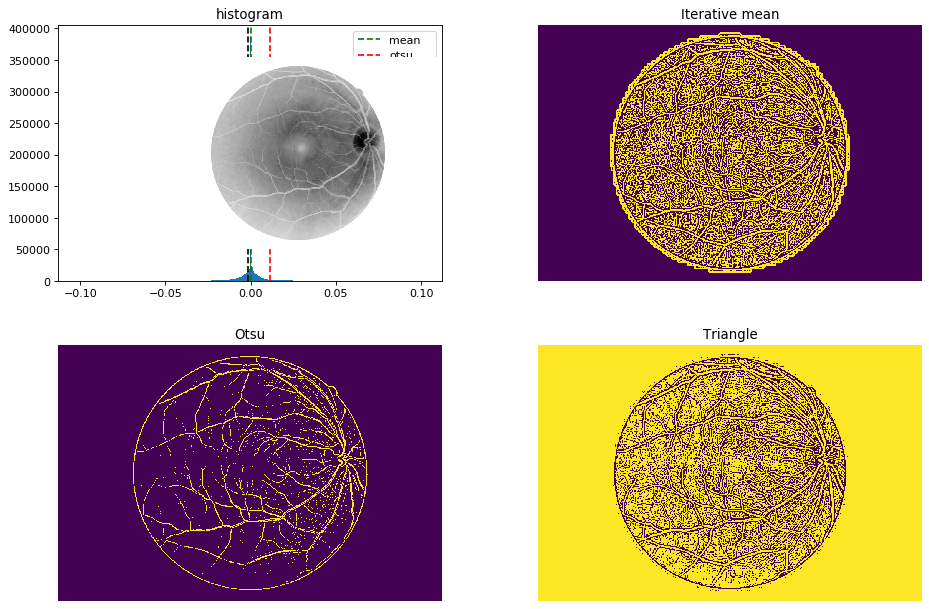

In [82]:
from skimage import filters

meanThresh = filters.threshold_mean(LoG_ridges)
print(meanThresh)

OtsuThresh = filters.threshold_otsu(LoG_ridges)
print(OtsuThresh)

TriThresh = filters.threshold_triangle(LoG_ridges)
print(TriThresh)

fig = plt.figure(num=None, figsize=(12, 8), dpi=80)
ax1 = fig.add_axes([0.1,0.6,0.4,0.4])

ax1.hist(LoG_ridges.flatten(),bins=250)

ax1.axvline(meanThresh, color='g', linestyle='--')
ax1.axvline(OtsuThresh, color='r', linestyle='--')
ax1.axvline(TriThresh, color='k', linestyle='--')
ax1.legend(['mean' ,'otsu', 'triangle'])
ax1.set_title('histogram')

ax1 = fig.add_axes([0.2,0.65,0.3,0.3])

plt.imshow(image_ridges, cmap=plt.cm.gray)
ax1.set_axis_off()


ax2 = fig.add_axes([0.6,0.6,0.4,0.4])
mask_mean = LoG_ridges>meanThresh

ax2.imshow(mask_mean)
ax2.set_title('Iterative mean')
ax2.set_axis_off()

ax2 = fig.add_axes([0.1,0.1,0.4,0.4])
mask_otsu = LoG_ridges>OtsuThresh

ax2.imshow(mask_otsu)
ax2.set_title('Otsu')
ax2.set_axis_off()

ax2 = fig.add_axes([0.6,0.1,0.4,0.4])
mask_tri = LoG_ridges>TriThresh

ax2.imshow(mask_tri)
ax2.set_title('Triangle')
ax2.set_axis_off()

**Play around with the width of the gaussian. Which thresholding algorithm works best in this case?**

### 1.5.4 Local thresholding
#### All of the methods we saw so far are *global* in the sense that the same threshold is applied to the whole picture. Sometimes we can have an image with vastly different intensity distributions at different locations. Using local thresholding, we can overcome such cases.

Let's compare the results from a global (Otsu) and a local threshold. 

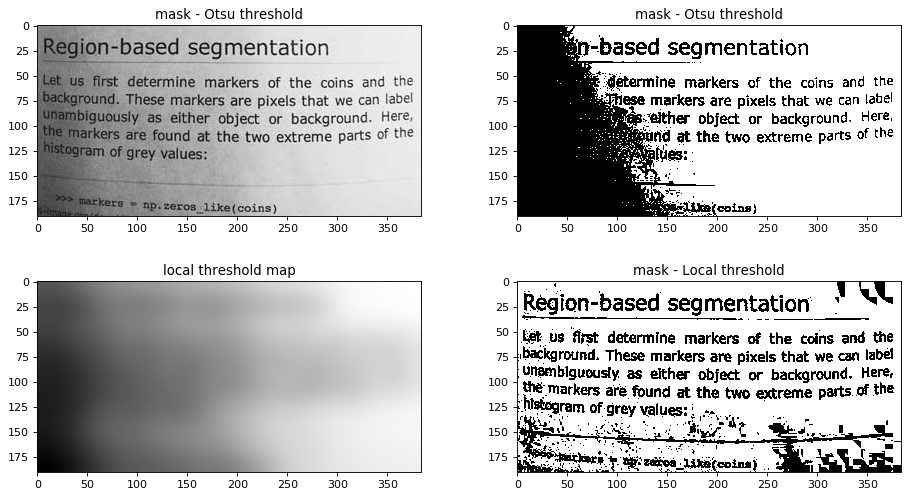

In [83]:
from skimage import data

image = data.page()
fig = plt.figure(num=None, figsize=(12, 8), dpi=80)

#global thresholding
threshGlobal = filters.threshold_otsu(image)

ax1 = fig.add_axes([0.1,0.6,0.4,0.4])
ax1.set_title('mask - Otsu threshold')
plt.imshow(image ,cmap='gray')

ax2 = fig.add_axes([0.6,0.6,0.4,0.4])
ax2.set_title('mask - Otsu threshold')
plt.imshow(image>threshGlobal,cmap='gray')

#local thresholding

#Try and change this number and see what happens
block_size  = 81

#calculate local threshold map
threshLocal = filters.threshold_local(image, block_size)

ax1 = fig.add_axes([0.1,0.2,0.4,0.4])
ax1.imshow(threshLocal,cmap='gray')
ax1.set_title('local threshold map')


ax2 = fig.add_axes([0.6,0.2,0.4,0.4])
ax2.set_title('mask - Local threshold')
plt.imshow(image>threshLocal,cmap='gray')


# 2. Image segmentation
### Image segmentation is the process of partitioning a digital image into multiple segments. The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze.
<img src="./images/imageSegmentation.png" width="400" height="400" >

## 2.1 Connected components
### After we generate a mask, the simplest segmentation is achieved by taking regions in the mask that are connected and labeling each one as a separate object. 

#### We begin by generating a simple mask using the triangle threshold method:

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage import filters

image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))
TriThresh = filters.threshold_triangle(image_nuclei)
#despeckle
mask = filters.gaussian(image_nuclei, sigma=1)>TriThresh

### [scikit-image's measure module](https://scikit-image.org/docs/dev/api/skimage.measure.html) implements a  variety of useful methods for segmentation. the *label* function returns a *labeled image* of connected components (CCs). Each CC is uniquely numbered by an integer.

$\begin{bmatrix} 
1 & 1 & 0 & 0 & 2\\
1 & 1 & 0 & 2 & 2\\
0 & 0 & 0 & 0 & 0\\
0 & 3 & 0 & 4 & 4\\
0 & 0 & 0 & 4 & 4\\
\end{bmatrix}$


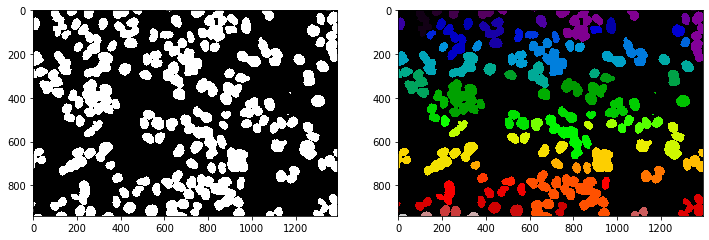

In [85]:
from skimage import measure
#generate a labeled matrix of connected components
labels = measure.label(mask)

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.subplot(122)
plt.imshow(labels, cmap='nipy_spectral')

#### We can easily generate a *mask* for a **specific** CC using the binary operation *labels==i*

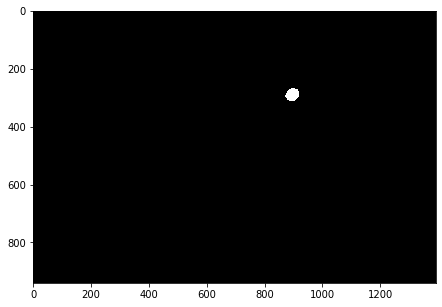

In [86]:
i=43
mask_of_CC_i = labels==i

plt.figure(figsize=(10,5))
plt.imshow(mask_of_CC_i, cmap='gray')

## Problem with simple CC segmentation : overlapping objects

### We often really care about having only a single object per label. Using CC, any overlapping objects will merge into one blob:

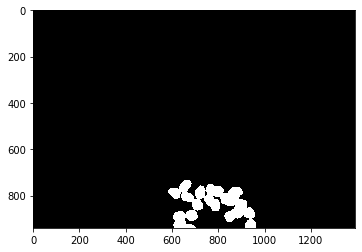

In [87]:
i=87
mask_of_CC_i = labels==i
plt.imshow(mask_of_CC_i, cmap='gray')

### These problems can be partially resolved using morphological operations, but there's no silver bullet

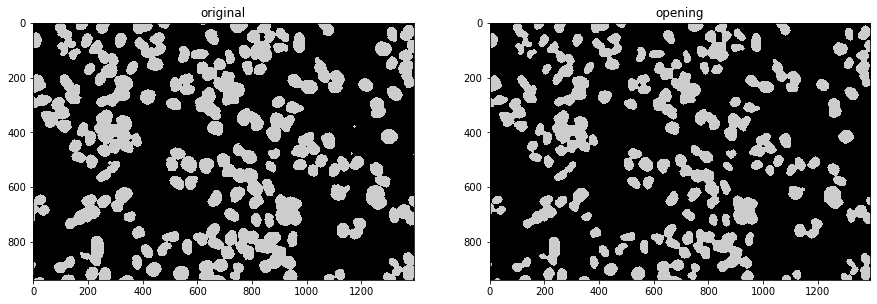

In [88]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

#define a "disk" structuring element
selem1 = disk(10)
selem2 = disk(7)

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.gca().set_title('original')
plt.imshow(mask, cmap='nipy_spectral')
plt.subplot(122)
plt.gca().set_title('opening')
plt.imshow(dilation(erosion(mask, selem1),selem2), interpolation='nearest', cmap='nipy_spectral')


## 2.2 Watershed based segmentation

### 2.2.1 The watershed algorithm
 The watershed transformation treats the image it operates upon like a topographic map, with the brightness of each point representing its height, and finds the lines that run along the tops of ridges.

<img src="./images/Diagram-of-watershed-algorithm.png" width="400" height="400" >

More precisely, the algorithm goes as follows:
1. *Label* local minima (i.e. $S_1$, $S_2$)
2. Move to next higher intensity level
3. Assign to each point the label of it's closest label set.
**<font color='red'>By passing the argument *watershed_line = 1* Points equidistant to multiple sets are labeled as boundaries and intensities set to 0</font>**
4. Repeat until all points are labeled

<img src="./images/watershed1.png" width="400" height="400" >

Let's start with a very naive application. We will invert the image, and then simply apply the *watershed* function from the [scikit-image morphology module](https://scikit-image.org/docs/dev/api/skimage.morphology). The function returns a labeled image. We'll plot the edges of that image using a Sobel filter.

<Figure size 1080x720 with 0 Axes>

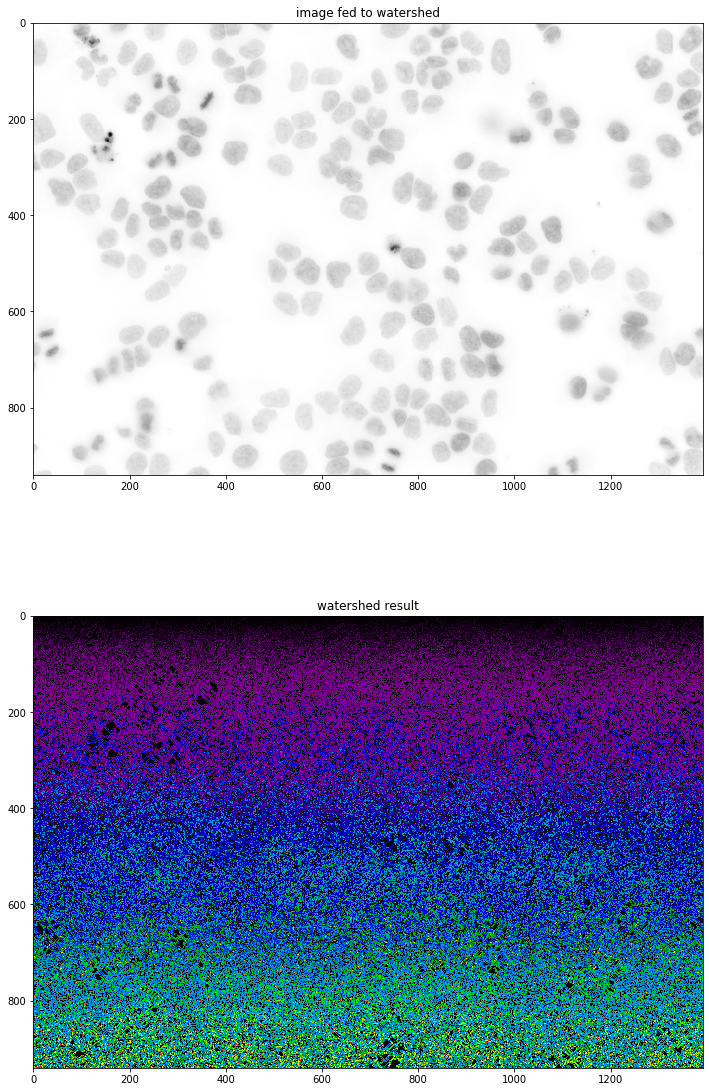

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage import filters

from skimage.util import invert
from skimage.morphology import watershed


image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))


#invert image
image_to_watershed = invert(image_nuclei)

#Calculate watershed transform, remember to pass the  watershed_line = 1 argument
labels_naive = watershed(image_to_watershed,watershed_line=1)
plt.figure(figsize=(15,10))

#let's look at all the boundaries
plt.figure(figsize=(12,20))
plt.subplot(211)
plt.gca().set_title('image fed to watershed')
plt.imshow(image_to_watershed, cmap='gray')
plt.subplot(212)
plt.gca().set_title('watershed result')
plt.imshow(filters.sobel(labels_naive), cmap='nipy_spectral')


### So this clearly didn't work. Why? How do we fix it?

Noise generates a ton of local minima. Each gets its own basin. This leads to massive oversegmentation.

#### Watershed segmentation is only a *part* of a segmentation pipeline. Preprocessing (denoising, smoothing, seeding minima) of the image is CRUCIAL for it to work well. 

<img src="./images/PreprocessingApproaches.png" width="600" height="400" >

The first thing we'll do is to apply the mask that we found before. This is simply done by adding a *mask* argument to the watershed function.

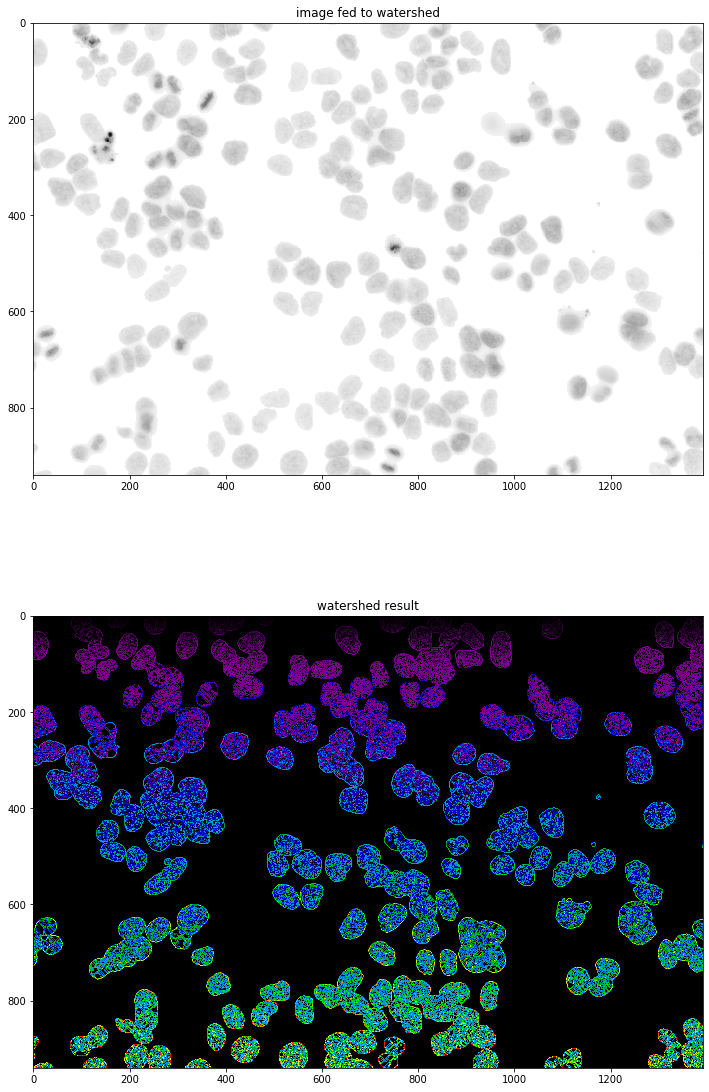

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage import filters

from skimage.util import invert
from skimage.morphology import watershed

image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))

#calculate mask
mask = filters.gaussian(image_nuclei, sigma=1)>TriThresh

#apply mask and invert image
masked_image = mask*image_nuclei

inverted_masked_image = invert(masked_image)

image_to_watershed = inverted_masked_image

#Calculate watershed transform
#Now, also pass the mask to the watershed function so it avoids segmenting the BG
labels_masked =watershed(image_to_watershed,mask=mask, watershed_line=1) 

#let's look at all the boundaries
plt.figure(figsize=(12,20))
plt.subplot(211)
plt.gca().set_title('image fed to watershed')
plt.imshow(image_to_watershed, cmap='gray')
plt.subplot(212)
plt.gca().set_title('watershed result')
plt.imshow(filters.sobel(labels_masked), cmap='nipy_spectral')


#### So we got rid of all the BG regions, but we are still oversegmenting. Why?

Let's try to smoothen the image and get rid of the many local minima. How wide should the gaussian kernel be?

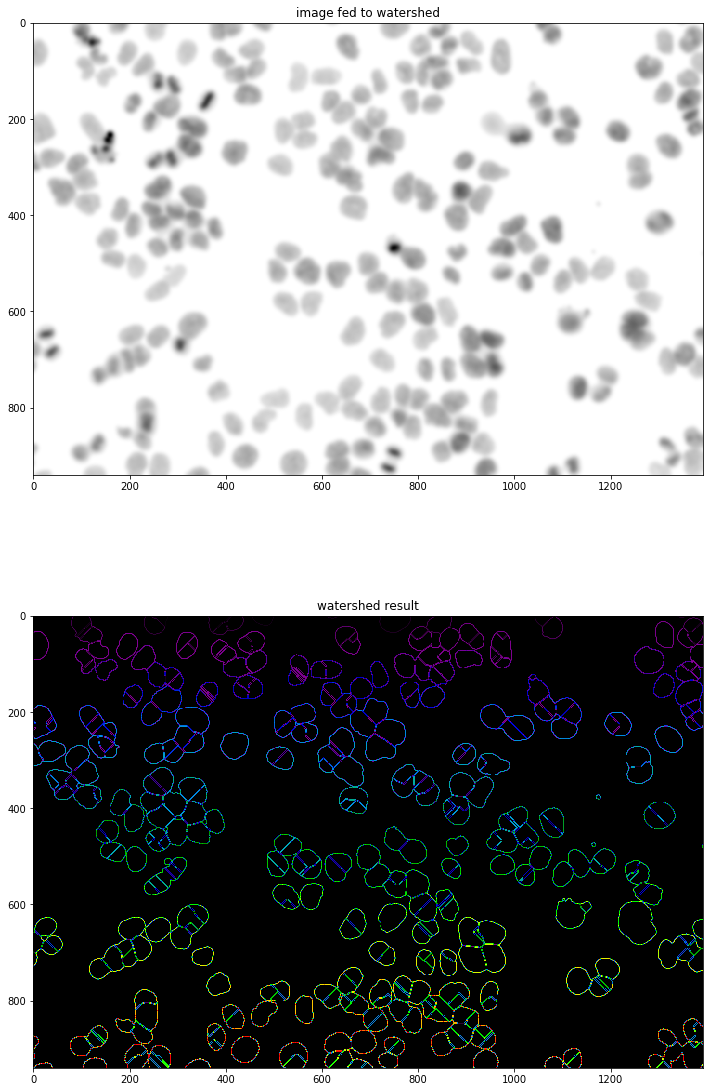

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage import filters

from skimage.util import invert
from skimage.morphology import watershed

image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))

#Calculate mask
mask = filters.gaussian(image_nuclei, sigma=1)>TriThresh

#mask, smooth, and invert the image
masked_image = image_nuclei*mask

sigma_for_smoothing = 4
smoothed_masked_image = filters.gaussian(masked_image, sigma=sigma_for_smoothing)

inverted_smoothed_masked_image = invert(smoothed_masked_image)

image_to_watershed = inverted_smoothed_masked_image
#Calculate watershed transform
#pass the mask to the watershed function so it avoids segmenting the BG
labels_masked_smooth = watershed(image_to_watershed, watershed_line = 1, mask=mask)

#let's look at all the boundaries
plt.figure(figsize=(12,20))
plt.subplot(211)
plt.gca().set_title('image fed to watershed')
plt.imshow(image_to_watershed, cmap='gray')
plt.subplot(212)
plt.gca().set_title('watershed result')
plt.imshow(filters.sobel(labels_masked_smooth), cmap='nipy_spectral')


### We're starting to get somewhere!! Can we do better?

#### We can do more to help the algorithm by providing local markers (seeds) from which to start the process

#### We will find seeds by calculating local maxima over areas that are larger than 30x30 pixels using the footprint argument for the function peak_local_max

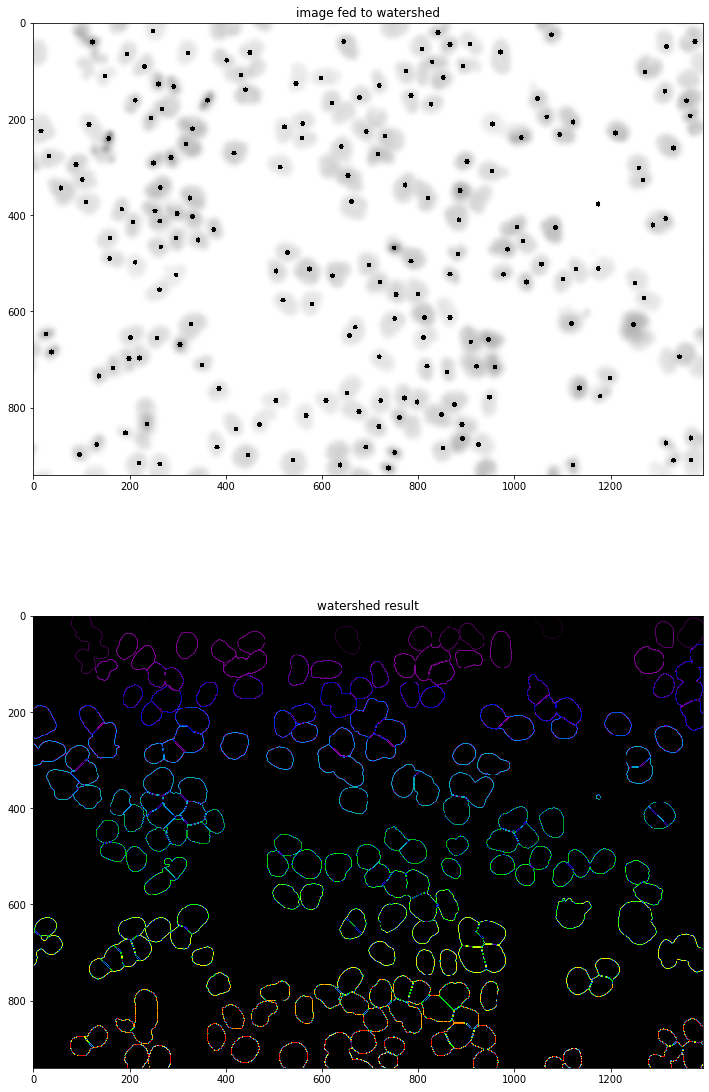

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage import filters
from skimage import measure

from skimage.util import invert
from skimage.morphology import watershed

from skimage.feature import peak_local_max

image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))


mask = filters.gaussian(image_nuclei, sigma=1)>TriThresh


#mask, smooth, and invert the image
masked_image = image_nuclei*mask
sigma_for_smoothing = 5
smoothed_masked_image = filters.gaussian(masked_image, sigma=sigma_for_smoothing)
inverted_smoothed_masked_image = invert(smoothed_masked_image)

image_to_watershed = inverted_smoothed_masked_image

#find local peaks to use as seeds
#focus on this function. Look at the effect of different arguments!
#Specifically. look at the footprint argument
MaskedImagePeaks = peak_local_max(-image_to_watershed,exclude_border=False, indices=False, footprint=np.ones((30,30)))

np.ones(shape=(30,30))
#This is for presentation of our markers
#create disk structuring element of radius 5
selem = disk(5)
#dilate local peaks so that close ones merge
peakMask = dilation(MaskedImagePeaks,selem)
# label local peak regions to find initial markers
markers = measure.label(peakMask)

#pass the *markers* argument to the watershed function
labels_localmax_markers = watershed(image_to_watershed,markers, watershed_line = 1, mask=mask)

#let's look at all the boundaries
plt.figure(figsize=(12,20))
plt.subplot(211)
plt.gca().set_title('image fed to watershed')
plt.imshow(image_to_watershed-peakMask, cmap='gray')
plt.clim((0.95, 1))
plt.subplot(212)
plt.gca().set_title('watershed result')
plt.imshow(filters.sobel(labels_localmax_markers), cmap='nipy_spectral')



#### This is pretty good! We're still getting a few errors here and there, but there's no big systematic over- or under- segmentation. This is a typical good result when dealing with real data. 

## Getting all files of a certain type in a directory:

In [104]:
import glob
Files = glob.glob("../Data/*png")
Files[2]

'../Data/xy040-2.png'

# 3. Feature extraction
### Feature extraction is a process of dimensionality reduction by which an initial raw image is reduced to a list of objects and attributes

<img src="./images/feat_ext.png" width="600" height="400" >

## 3.1 Extracting region properties

### [scikit-image's measure module](https://scikit-image.org/docs/dev/api/skimage.measure.html)  implements a  method called *regionprops* that accepts a labeled mask of connected components, and, optionally, a corresponding image, and returns a list.  Each object on the list contains useful data about the size, shape, position, and intensity ([see the full list here](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops)) of a specific component. 

The length of the list is equal to the total number of objects detected. 


#### We'll start by extracting the number of CC we found and the area of each CC

In [106]:
from skimage import measure

#We use regionprops to extract properties on all the CCs
props = measure.regionprops(labels_localmax_markers,image_nuclei)
#how many total connected components did we get?
print(len(props))
props[1].mean_intensity

193


0.006691903

(array([ 6., 16., 21., 30., 39., 29., 22., 18.,  6.,  6.]),
 array([0.00359859, 0.00417765, 0.00475671, 0.00533577, 0.00591484,
        0.0064939 , 0.00707296, 0.00765202, 0.00823108, 0.00881015,
        0.00938921], dtype=float32),
 <a list of 10 Patch objects>)

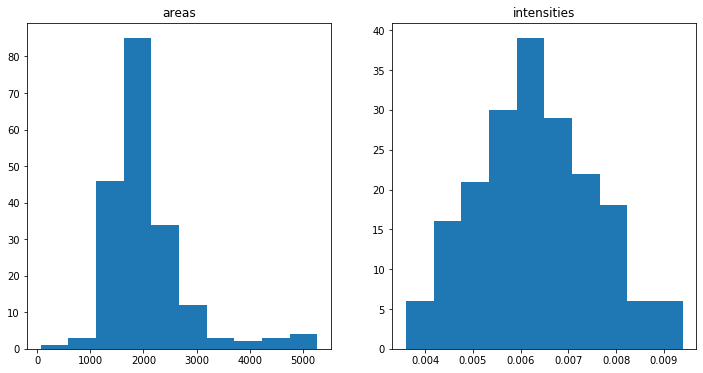

In [107]:
#This is how we make a list of a specific property for each CC
areas = [r.area for r in props]

#Do the same for the "mean_intensity" property
intensities = [r.mean_intensity for r in props]

#let's look at all the boundaries
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.gca().set_title('areas')
plt.hist(areas)
plt.subplot(122)
plt.gca().set_title('intensities')
plt.hist(intensities)

## 3.2 Some options for data presentation

**We can look at individual objects we found**

Text(0.5, 1.0, 'Single cell')

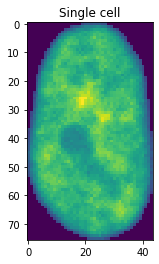

In [111]:
i=10
plt.imshow(props[i].intensity_image)
plt.gca().set_title('Single cell')

**Let's use a scatter plot to compare our results to the image**

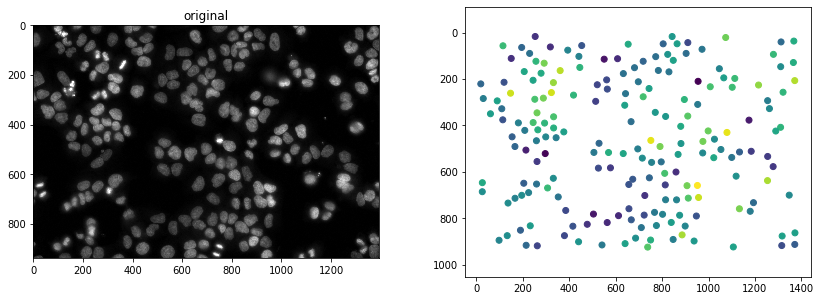

In [112]:
intensities = np.array([r.mean_intensity for r in props])
centroids = np.array([r.centroid for r in props])


fig = plt.figure(figsize=(12,15))
fig.add_axes([0.1,0.6,0.4,0.25])
plt.gca().set_title('original')
plt.imshow(image_nuclei, interpolation='nearest', cmap=plt.cm.gray, vmin=0, vmax=0.02)
fig.add_axes([0.6,0.6,0.4,0.25])
plt.scatter(centroids[:,1],centroids[:,0], c=intensities)
plt.axis('equal')
plt.gca().invert_yaxis()

**Or even nicer scatter plots!**

Text(972.0489229645856, 72.17670682730923, '11')

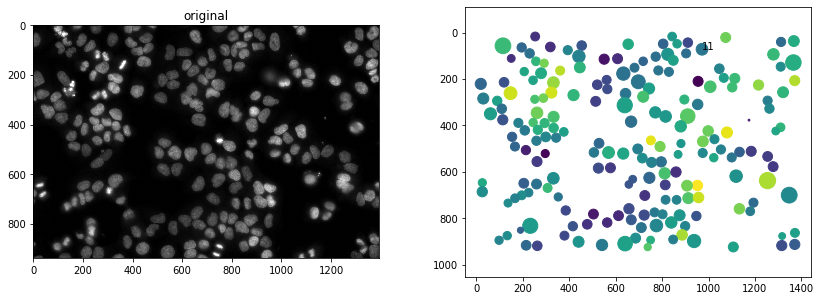

In [113]:
intensities = np.array([r.mean_intensity for r in props])
areas = np.array([r.area for r in props])

centroids = np.array([r.centroid for r in props])


fig = plt.figure(figsize=(12,15))
fig.add_axes([0.1,0.6,0.4,0.25])
plt.gca().set_title('original')
plt.imshow(image_nuclei, interpolation='nearest', cmap=plt.cm.gray, vmin=0, vmax=0.02)
fig.add_axes([0.6,0.6,0.4,0.25])
plt.scatter(centroids[:,1],centroids[:,0], c=intensities, s=areas/20)
plt.axis('equal')
plt.gca().invert_yaxis()

plt.text(centroids[10,1],centroids[10,0],props[10].label)

**You can even draw your points directly on the image!**

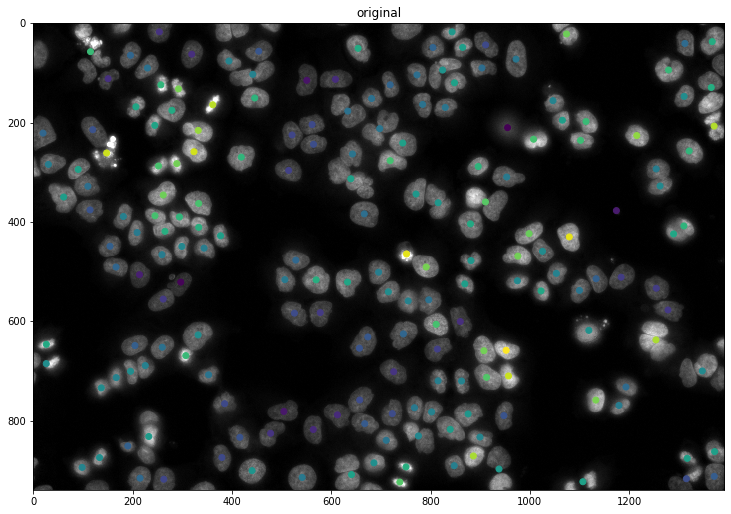

In [114]:
intensities = np.array([r.mean_intensity for r in props])
areas = np.array([r.area for r in props])

centroids = np.array([r.centroid for r in props])


fig = plt.figure(figsize=(12,15))
fig.add_axes([0.1,0.6,0.8,0.5])
plt.gca().set_title('original')
plt.imshow(image_nuclei, interpolation='nearest', cmap=plt.cm.gray, vmin=0, vmax=0.02)
plt.gca().patch.set_alpha(0.5)
plt.scatter(centroids[:,1],centroids[:,0], c=intensities, alpha=1)


## 3.3 Converting regionprops to a table (Dataframe)

#### Let's define some useful functions for converting a list of props into a pandas dataframe. These should become obsolete soon since the new version of scikit-image will have this functionality #### These are some useful functions for converting a list of props into a pandas dataframe

In [115]:
import pandas as pd

def scalar_attributes_list(im_props):
    """
    Makes list of all scalar, non-dunder, non-hidden
    attributes of skimage.measure.regionprops object
    """
    
    attributes_list = []
    
    for i, test_attribute in enumerate(dir(im_props[0])):
        
        #Attribute should not start with _ and cannot return an array
        #does not yet return tuples
        if test_attribute[:1] != '_' and not\
                isinstance(getattr(im_props[0], test_attribute), np.ndarray):                
            attributes_list += [test_attribute]
            
    return attributes_list


def regionprops_to_df(im_props):
    """
    Read content of all attributes for every item in a list
    output by skimage.measure.regionprops
    """

    attributes_list = scalar_attributes_list(im_props)

    # Initialise list of lists for parsed data
    parsed_data = []

    # Put data from im_props into list of lists
    for i, _ in enumerate(im_props):
        parsed_data += [[]]
        
        for j in range(len(attributes_list)):
            parsed_data[i] += [getattr(im_props[i], attributes_list[j])]

    # Return as a Pandas DataFrame
    return pd.DataFrame(parsed_data, columns=attributes_list)

### Now, to get all the properties in table form we simply run:

In [116]:
props_df = regionprops_to_df(props)
props_df

/Users/alon/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/Users/alon/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


area                    bbox  bbox_area  \
0    1571       (0, 231, 40, 281)       2000   
1    1504       (0, 816, 40, 870)       2160   
2    1997     (0, 1043, 49, 1101)       2842   
3    2199      (23, 628, 82, 680)       3068   
4    2373     (6, 1340, 70, 1392)       3328   
..    ...                     ...        ...   
188  1889    (891, 190, 940, 240)       2450   
189  1831    (893, 240, 940, 286)       2162   
190  4249    (866, 605, 940, 706)       7474   
191  1990  (899, 1063, 940, 1140)       3157   
192  1046    (906, 718, 940, 758)       1360   

                                    centroid  convex_area  eccentricity  \
0    (17.156588160407384, 253.7644812221515)         1609      0.531654   
1             (17.33244680851064, 843.34375)         1590      0.752094   
2    (21.534802203304956, 1073.849774661993)         2129      0.720334   
3     (50.39381537062301, 654.0491132332878)         2265      0.698392   
4    (36.878634639696585, 1367.251580278129)         2448      0.679207   
..                                       ...          ...           ...   
188               (916.0, 214.8644785600847)         1942      0.486755   
189     (918.210813762971, 262.800109229929)         1862      0.303558   
190    (908.822546481525, 640.7867733584372)         5146      0.726801   
191  (923.2276381909547, 1106.7361809045226)         2319      0.905365   
192   (923.8804971319312, 738.0688336520077)         1075      0.638097   

     equivalent_diameter  euler_number    extent  filled_area  ...  \
0              44.724259             1  0.785500         1571  ...   
1              43.760168             1  0.696296         1504  ...   
2              50.424789             1  0.702674         1997  ...   
3              52.913644             1  0.716754         2199  ...   
4              54.967240             1  0.713041         2373  ...   
..                   ...           ...       ...          ...  ...   
188            49.042324             1  0.771020         1889  ...   
189            48.283554             1  0.846901         1831  ...   
190            73.552667             1  0.568504         4249  ...   
191            50.336336             1  0.630345         1990  ...   
192            36.493952             1  0.769118         1046  ...   

    major_axis_length  max_intensity mean_intensity  min_intensity  \
0           49.623666       0.007462       0.004448       0.002106   
1           54.266680       0.013687       0.006692       0.002014   
2           62.102149       0.014206       0.008100       0.001862   
3           62.847371       0.012284       0.007121       0.001877   
4           64.437995       0.012650       0.007155       0.001816   
..                ...            ...            ...            ...   
188         52.603354       0.008515       0.005553       0.001923   
189         49.978873       0.006973       0.004818       0.001953   
190         99.780077       0.011398       0.006887       0.001938   
191         86.117327       0.015244       0.006896       0.001984   
192         41.684105       0.024292       0.007840       0.002029   

     minor_axis_length  orientation   perimeter  \
0            42.029339     0.302637  155.497475   
1            35.764751     0.400887  157.195959   
2            43.075765    -0.722874  182.124892   
3            44.980849    -1.025429  181.338095   
4            47.294044     1.094054  190.994949   
..                 ...          ...         ...   
188          45.951068     0.971594  164.953319   
189          47.620513     1.121577  162.083261   
190          68.533750    -0.743456  326.929978   
191          36.568295     0.233664  231.681241   
192          32.094941    -0.252480  123.154329   

                                                slice  solidity  \
0         (slice(0, 40, None), slice(231, 281, None))  0.976383   
1         (slice(0, 40, None), slice(816, 870, None))  0.945912   
2       (slice(0, 49, None), sl

### Finally, if we imaged our cells in multiple channels, we would want to use the same segmented nuclei and measure intensities of other channels.

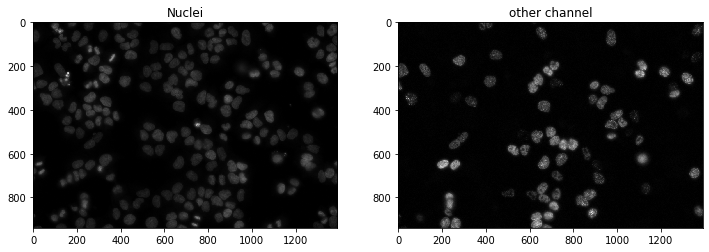

In [117]:
from skimage import measure
from skimage import img_as_float
import matplotlib.image as mpimg

image_2ndChannel = img_as_float(mpimg.imread("../Data/xy040-2.png"))

# extract regionprops using labels_localmax_markers mask from image_2ndChannel
props_other_channel = measure.regionprops(labels_localmax_markers,image_2ndChannel)


plt.figure(figsize=(12,6))
plt.subplot(121)
plt.gca().set_title('Nuclei')
plt.imshow(image_nuclei, cmap='gray')
plt.subplot(122)
plt.gca().set_title('other channel')
plt.imshow(image_2ndChannel, cmap='gray')

### Extract only the intensity related features

(array([122.,   4.,   6.,   2.,   2.,   6.,   4.,   4.,   6.,   6.,   8.,
          3.,   6.,   5.,   3.,   4.,   1.,   0.,   0.,   1.]),
 array([7.7042452e-05, 4.0794979e-04, 7.3885714e-04, 1.0697645e-03,
        1.4006718e-03, 1.7315791e-03, 2.0624865e-03, 2.3933938e-03,
        2.7243011e-03, 3.0552084e-03, 3.3861157e-03, 3.7170232e-03,
        4.0479302e-03, 4.3788375e-03, 4.7097453e-03, 5.0406526e-03,
        5.3715599e-03, 5.7024672e-03, 6.0333745e-03, 6.3642818e-03,
        6.6951890e-03], dtype=float32),
 <a list of 20 Patch objects>)

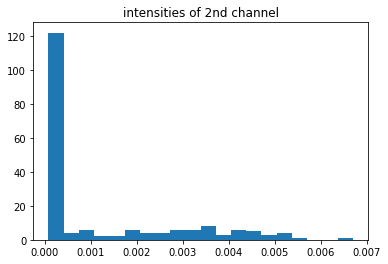

In [119]:
mean_2nd_channel = [r.mean_intensity for r in props_other_channel]
max_2nd_channel = [r.max_intensity for r in props_other_channel]
min_2nd_channel = [r.min_intensity for r in props_other_channel]

plt.gca().set_title('intensities of 2nd channel')
plt.hist(mean_2nd_channel,bins=20)


### Add these new features to the pandas dataframe

In [120]:
props_df['mean_intensity_ch2'] = mean_2nd_channel
props_df['max_intensity_ch2'] = max_2nd_channel
props_df['min_intensity_ch2'] = min_2nd_channel

props_df

area                    bbox  bbox_area  \
0    1571       (0, 231, 40, 281)       2000   
1    1504       (0, 816, 40, 870)       2160   
2    1997     (0, 1043, 49, 1101)       2842   
3    2199      (23, 628, 82, 680)       3068   
4    2373     (6, 1340, 70, 1392)       3328   
..    ...                     ...        ...   
188  1889    (891, 190, 940, 240)       2450   
189  1831    (893, 240, 940, 286)       2162   
190  4249    (866, 605, 940, 706)       7474   
191  1990  (899, 1063, 940, 1140)       3157   
192  1046    (906, 718, 940, 758)       1360   

                                    centroid  convex_area  eccentricity  \
0    (17.156588160407384, 253.7644812221515)         1609      0.531654   
1             (17.33244680851064, 843.34375)         1590      0.752094   
2    (21.534802203304956, 1073.849774661993)         2129      0.720334   
3     (50.39381537062301, 654.0491132332878)         2265      0.698392   
4    (36.878634639696585, 1367.251580278129)         2448      0.679207   
..                                       ...          ...           ...   
188               (916.0, 214.8644785600847)         1942      0.486755   
189     (918.210813762971, 262.800109229929)         1862      0.303558   
190    (908.822546481525, 640.7867733584372)         5146      0.726801   
191  (923.2276381909547, 1106.7361809045226)         2319      0.905365   
192   (923.8804971319312, 738.0688336520077)         1075      0.638097   

     equivalent_diameter  euler_number    extent  filled_area  ...  \
0              44.724259             1  0.785500         1571  ...   
1              43.760168             1  0.696296         1504  ...   
2              50.424789             1  0.702674         1997  ...   
3              52.913644             1  0.716754         2199  ...   
4              54.967240             1  0.713041         2373  ...   
..                   ...           ...       ...          ...  ...   
188            49.042324             1  0.771020         1889  ...   
189            48.283554             1  0.846901         1831  ...   
190            73.552667             1  0.568504         4249  ...   
191            50.336336             1  0.630345         1990  ...   
192            36.493952             1  0.769118         1046  ...   

    min_intensity  minor_axis_length orientation   perimeter  \
0        0.002106          42.029339    0.302637  155.497475   
1        0.002014          35.764751    0.400887  157.195959   
2        0.001862          43.075765   -0.722874  182.124892   
3        0.001877          44.980849   -1.025429  181.338095   
4        0.001816          47.294044    1.094054  190.994949   
..            ...                ...         ...         ...   
188      0.001923          45.951068    0.971594  164.953319   
189      0.001953          47.620513    1.121577  162.083261   
190      0.001938          68.533750   -0.743456  326.929978   
191      0.001984          36.568295    0.233664  231.681241   
192      0.002029          32.094941   -0.252480  123.154329   

                                                slice  solidity  \
0         (slice(0, 40, None), slice(231, 281, None))  0.976383   
1         (slice(0, 40, None), slice(816, 870, None))  0.945912   
2       (slice(0, 49, None), slice(1043, 1101, None))  0.937999   
3        (slice(23, 82, None), slice(628, 680, None))  0.970861   
4       (slice(6, 70, None), slice(1340, 1392, None))  0.969363   
..                                                ...       ...   
188    (slice(891, 940, None), slice(190, 240, None))  0.972709   
189    (slice(893, 940, None), slice(240, 286, None))  0.983351   
190    (slice(866, 940, None), slice(605, 706, None))  0.825690   
191  (slice(899, 940, None), slice(1063, 1140, None))  0.858129   
192    (slice(906, 940, None), slice(718, 758, None))  0.973023   

                            weighted_centroid  mean_intensity_ch2  \
0     (16.40264351497449, 253.6091788193155

**Sometimes it's easier to see a bimodal distribution in log scale**

(array([25., 29., 37., 11., 10.,  7.,  2.,  3.,  1.,  1.,  2.,  4.,  2.,
         3.,  6.,  7., 15., 13., 13.,  2.]),
 array([-9.47115396, -9.24791457, -9.02467517, -8.80143578, -8.57819638,
        -8.35495699, -8.13171759, -7.9084782 , -7.6852388 , -7.46199941,
        -7.23876001, -7.01552062, -6.79228122, -6.56904183, -6.34580243,
        -6.12256304, -5.89932364, -5.67608425, -5.45284485, -5.22960546,
        -5.00636606]),
 <a list of 20 Patch objects>)

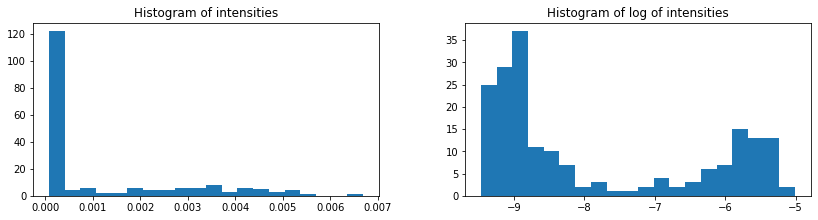

In [121]:
fig = plt.figure(figsize=(12,6))
fig.add_axes([0.1,0.1,0.4,0.4])
plt.gca().set_title('Histogram of intensities')
plt.hist(props_df.mean_intensity_ch2,20)
fig.add_axes([0.6,0.1,0.4,0.4])
plt.gca().set_title('Histogram of log of intensities')

plt.hist(np.log(props_df.mean_intensity_ch2),20)

**We can compare distributions of different channels**

Text(0, 0.5, 'Ch1')

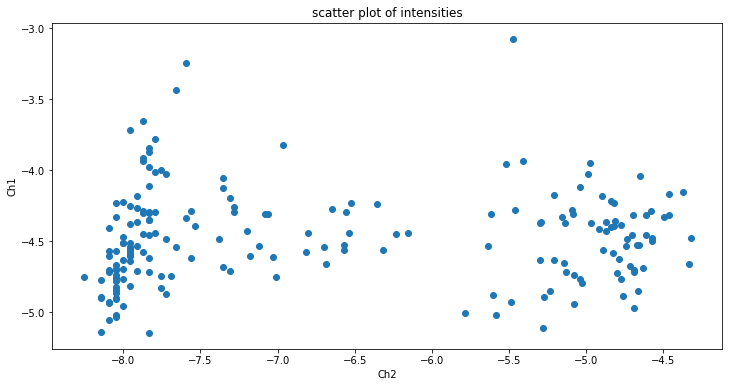

In [122]:
plt.figure(figsize=(12,6))

plt.gca().set_title('scatter plot of intensities')
plt.scatter(np.log(props_df['max_intensity_ch2']), np.log(props_df['max_intensity']))
plt.xlabel('Ch2')
plt.ylabel('Ch1')

### And so, we've successfully implemented a simple image segmentation pipeline for multicolor microscopy data. 


#### Fin.



